<a href="https://colab.research.google.com/github/PadariyaDebo/Synthetic-Data-Genration-using-GAN/blob/main/Synthesize_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
# cylinder bell funnel based on "Learning comprehensible descriptions of multivariate time series"
def generate_bell(length, amplitude, default_variance):
    bell = np.random.normal(0, default_variance, length) + amplitude * np.arange(length)/length
    return bell

In [3]:
def generate_funnel(length, amplitude, default_variance):
    funnel = np.random.normal(0, default_variance, length) + amplitude * np.arange(length)[::-1]/length
    return funnel

In [4]:
def generate_cylinder(length, amplitude, default_variance):
    cylinder = np.random.normal(0, default_variance, length) + amplitude
    return cylinder

In [5]:
std_generators = [generate_bell, generate_funnel, generate_cylinder]

In [6]:
def generate_pattern_data(length=100, avg_pattern_length=5, avg_amplitude=1, 
                          default_variance = 1, variance_pattern_length = 10, variance_amplitude = 2, 
                          generators = std_generators, include_negatives = True):
    data = np.random.normal(0, default_variance, length)
    current_start = random.randint(0, avg_pattern_length)
    current_length = current_length = max(1, math.ceil(random.gauss(avg_pattern_length, variance_pattern_length)))
    
    while current_start + current_length < length:
        generator = random.choice(generators)
        current_amplitude = random.gauss(avg_amplitude, variance_amplitude)
        
        while current_length <= 0:
            current_length = -(current_length-1)
        pattern = generator(current_length, current_amplitude, default_variance)
        
        if include_negatives and random.random() > 0.5:
            pattern = -1 * pattern
            
        data[current_start : current_start + current_length] = pattern
        
        current_start = current_start + current_length + random.randint(0, avg_pattern_length)
        current_length = max(1, math.ceil(random.gauss(avg_pattern_length, variance_pattern_length)))
    
    return np.array(data)

In [7]:

#Generate Time Series and Plot
n_data= [50, 150, 500]
n_pattern_length = [5,10,20]

In [8]:
from itertools import product
config_ = list(product(n_data,n_pattern_length))    

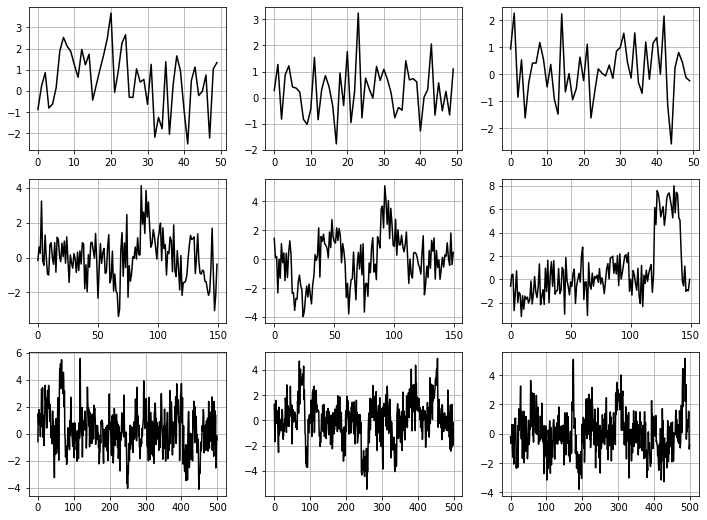

In [9]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12,9))
ax = axes.ravel()
i=0
for n1,n2 in config_:
    data = generate_pattern_data(length=n1,avg_pattern_length=n2)
    ax[i].plot(data,color='k')
    ax[i].grid(True)
    i+=1
plt.show()